## 1. 표준 토큰화

자연어 처리에 사용되는 대표적인 파이썬 패키지에는 NLTK가 있습니다. 해당 패키지에서는 말뭉치, 토큰 생성, 형태소 분석, 품사 태킹 등을 제공합니다.

**1.1 표준 토큰화**

표준 토큰화 중 하나인 Treebank 표준 토큰화를 사용하는 방법은 아래와 같습니다.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Model-based RL don't need a value function for the policy."
print(tokenizer.tokenize(text))

['Model-based', 'RL', 'do', "n't", 'need', 'a', 'value', 'function', 'for', 'the', 'policy', '.']


**1.2 토큰화 라이브러리**

Treebank 토큰화 이외에도 NLTK 패키지에는 여러 종류의 토큰화 패키지가 있습니다. 예를 들면 아래와 같은 word_tokenizer

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(text))

['Model-based', 'RL', 'do', "n't", 'need', 'a', 'value', 'function', 'for', 'the', 'policy', '.']


## 2. 어간 추출 및 표제어 추출

단어의 형태소 level에서 분석을 하게 되면 다른 품사 또는 다른 시제의 단어라고 해도 같은 형태로 토큰화를 할 수 있습니다. 두 가지 대표적인 어간 추출 패키지를 알아봅시다.

**2.1 어간 추출 (Stemmer) vs 표제어 추출 (Lemmatizer)**

대표적인 어간 추출 (stemming) 기법인 Porter 및 Lancaster 추출 패키지를 불러오고, 이를 활용하는 방법입니다. 결과를 확인해보고, 어간 추출 기반 분석의 문제점을 확인해봅시다.

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer
stem1 = PorterStemmer()
stem2 = LancasterStemmer()
words = ["eat", "ate", "eaten", "eating"]
print("Porter Stemmer   :", [stem1.stem(w) for w in words])
print("Lancaster Stemmer:", [stem2.stem(w) for w in words])

Porter Stemmer   : ['eat', 'ate', 'eaten', 'eat']
Lancaster Stemmer: ['eat', 'at', 'eat', 'eat']


In [ ]:
import nltk
from nltk import WordNetLemmatizer
nltk.download('wordnet')
lemm = WordNetLemmatizer()
words = ["eat", "ate", "eaten", "eating"]
print("WordNet Lemmatizer:",[lemm.lemmatize(w, pos="v") for w in words])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


WordNet Lemmatizer: ['eat', 'eat', 'eat', 'eat']


## 3. 불용어 제거

**3.1 불용어 예시 확인**

영어에서의 불용어 중 예시 몇 가지를 확인할 수 있는 방법입니다. 마지막 줄의 숫자를 증가시키면 볼 수 있는 단어의 수가 증가합니다. 마찬가지로 stopword 단어 데이터를 받기 위한 작업이 필요합니다.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english')[:5])

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

input_sentence = "We should all study hard for the exam."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(input_sentence)
result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
print(word_tokens)
print(result)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...


['We', 'should', 'all', 'study', 'hard', 'for', 'the', 'exam', '.']
['We', 'study', 'hard', 'exam', '.']


[nltk_data]   Package punkt is already up-to-date!


불용어 목록을 다운받은 다음에, 문장의 토큰화 결과에 적용시키는 과정을 담은 알고리즘입니다. 우선 word_tokenize 함수를 사용해 input_sentence를 토큰화합니다. 그리고 토큰화한 문장의 각 단어가 불용어 목록에 있는지 여부를 확인한 후에, 없을 경우에만 result에 포함시킵니다.

## 4. 정수 인코딩 및 Sorting

**4.1 Enumerate 사용 복습**

In [ ]:
mylist = ['English', 'Math', 'Science']
for n, name in enumerate(mylist):
    print("Course : {}, Number : {}".format(name, n))

Course : English, Number : 0
Course : Math, Number : 1
Course : Science, Number : 2


**4.2 정수 인코딩 및 High-frequency Sorting**

In [ ]:
vocab = {'apple': 2, 'July': 6, 'piano': 4, 'cup': 8, 'orange': 1}
vocab_sort = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sort)
word2inx = {word[0] : index + 1 for index, word in enumerate(vocab_sort)}
print(word2inx)

[('cup', 8), ('July', 6), ('piano', 4), ('apple', 2), ('orange', 1)]
{'cup': 1, 'July': 2, 'piano': 3, 'apple': 4, 'orange': 5}


BoW로 만들어진 토큰화의 결과를 가장 높은 빈도수부터 재정렬하고, 이를 통해 정수 인코딩을 하는 과정을 나타내고 있습니다.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Model-based RL don't need a value function for the policy, " \
       "but some of Model-based RL algorithms do have a value function."
token_text = tokenizer.tokenize(text)
word2inx = {}
Bow = []
for word in token_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1,1)
    else:
        inx = word2inx.get(word)
        Bow[inx] += 1
print(word2inx)
print(Bow)

{'Model-based': 0, 'RL': 1, 'do': 2, "n't": 3, 'need': 4, 'a': 5, 'value': 6, 'function': 7, 'for': 8, 'the': 9, 'policy': 10, ',': 11, 'but': 12, 'some': 13, 'of': 14, 'algorithms': 15, 'have': 16, '.': 17}
[2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


문장으로부터 토큰화를 통해 토큰 리스트를 만들고, 이를 이용해서 BoW를 생성하는 전체 알고리즘을 나타낸 것입니다. 우선 빈 딕셔너리 Bow = []와 빈 리스트 word2inx = {}를 만들고, 리스트에 없는 단어의 경우 새로 리스트와 BoW에 단어를 추가하고, 리스트에 있는 단어의 경우 Bow의 값만 증가시켜 주는 과정을 나타냅니다.

## 5. 유사도 분석

**5.1 코사인 유사도**

In [ ]:
import numpy as np
def cos_sim(A, B):
    return np.dot(A, B) / (np.linalg.norm(A)*np.linalg.norm(B))

a = [1,0,0,1]
b = [0,1,1,0]
c = [1,1,1,1]
print(cos_sim(a,b), cos_sim(b,c), cos_sim(c,a))

0.0 0.7071067811865475 0.7071067811865475


**5.2 레반슈타인 거리**

In [ ]:
import numpy as np
def leven(text1, text2):
    len1 = len(text1) + 1
    len2 = len(text2) + 1
    sim_array = np.zeros((len1, len2))
    sim_array[:,0] = np.linspace(0, len1-1, len1)
    sim_array[0,:] = np.linspace(0, len2-1, len2)
    for i in range(1,len1):
        for j in range(1,len2):
            add_char = sim_array[i-1,j] + 1
            sub_char = sim_array[i,j-1] + 1
            if text1[i-1] == text2[j-1]:
                mod_char = sim_array[i-1,j-1]
            else:
                mod_char = sim_array[i-1,j-1] + 1
            sim_array[i,j] = min([add_char, sub_char, mod_char])
    return sim_array
print(leven('데이터마이닝','데이타마닝'))

[[0. 1. 2. 3. 4. 5.]
 [1. 0. 1. 2. 3. 4.]
 [2. 1. 0. 1. 2. 3.]
 [3. 2. 1. 1. 2. 3.]
 [4. 3. 2. 2. 1. 2.]
 [5. 4. 3. 3. 2. 2.]
 [6. 5. 4. 4. 3. 2.]]


## 6. Word2Vec - CBoW, SkipGram

**6.1 CBoW와 SkipGram을 위한 전처리 복습 및 Overview**

In [ ]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
data = pd.read_csv('transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ''.join(str(data.iloc[i,0]) for i in range(100))
print('Total word count: ', len(merge_data))
print(merge_data[:40])

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  1511817
Good morning. How are you?(Laughter)It's


In [ ]:
tokenizer = RegexpTokenizer("[\w]+")
token_text = tokenizer.tokenize(merge_data)

stop_words = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))
print(token_stop_text[:10])

After cleaning : 147300
['Good', 'morning', 'How', 'Laughter', 'It', 'great', 'I', 'blown', 'away', 'whole']


In [ ]:
word2inx = {}
Bow = []
for word in token_stop_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1,1)
    else:
        inx = word2inx.get(word)
        Bow[inx] += 1
print('Unique Words Count :', len(Bow))

Unique Words Count : 16689


**6.2 nltk 내장 함수를 이용한 CBoW 학습**

In [ ]:
import numpy as np
token_stop_text = np.reshape(np.array(token_stop_text),[-1,1])
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 100, window = 5, min_count = 2, sg = 0)
model.build_vocab(token_stop_text)
model.train(token_stop_text, total_examples = model.corpus_count, epochs = 30, report_delay = 1)
vocabs = model.wv.key_to_index.keys()
word_vec_list = [model.wv[i] for i in vocabs]
# sg : skip-gram, 1 is SG, 0 is CBoW
# vector_size : embedded vector size
# window : context window size
# min_count : do not apply word2vec to sparse words

**6.3 PCA를 통한 학습 모델 시각화**

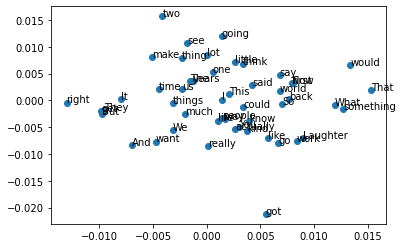

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pcafit = pca.fit_transform(word_vec_list)
x = pcafit[0:50,0]
y = pcafit[0:50,1]
import matplotlib.pyplot as plt
plt.scatter(x, y, marker = 'o')
for i, v in enumerate(vocabs):
    if i <= 49:
        plt.annotate(v, xy = (x[i], y[i]))
plt.show()

## 7. SGNS: SkipGram with Negative Sampling

**7.1 SkipGram 전용 Dataset 구성**

토큰화된 결과만 필요했던 CBOW 및 SkipGram과는 달리, SGNS는 두 단어의 인접 여부가 labeling이 되어 있어야 합니다. 이를 간편하게 하기 위해서 keras에서 제공하는 전처리 도구를 활용합니다. 기본적인 토큰화 과정을 거친 후에, skipgram 함수를 이용하여 데이터셋을 {단어2개} → {0 / 1} 로 매핑되어있도록 변환합니다.

In [ ]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
data = pd.read_csv('transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ''.join(str(data.iloc[i,0]) for i in range(30))
print('Total word count: ', len(merge_data))

tokenizer = RegexpTokenizer("[\w]+")
token_text = tokenizer.tokenize(merge_data)

stop_words = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  507413
After cleaning : 50038


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_stop_text)
word2idx = tokenizer.word_index
encoded = tokenizer.texts_to_sequences(token_stop_text)
encoded = np.array(encoded).T
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_gram = [skipgrams(sample, vocabulary_size = len(word2idx)+1,
                       window_size = 10) for sample in encoded]

In [ ]:
import torch
import torch.nn as nn
from torch import LongTensor as LT
from torch import FloatTensor as FT

Word2Vec의 원리는 각 단어마다 지정된 고유 벡터 값을 생성하는 것입니다. 이를 위해서는 고유의 벡터를 의미하는 embedding layer를 만들어야 합니다. 다음 Word2Vec class에서 그 틀을 생성합니다.

In [ ]:
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(Word2Vec, self).__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.word1_vector = nn.Embedding(self.vocab_size, self.embed_size)
        self.word2_vector = nn.Embedding(self.vocab_size, self.embed_size)
        self.word1_vector.weight = nn.Parameter(torch.cat([torch.zeros(1, self.embed_size), FT(self.vocab_size-1,
                                                                       self.embed_size).uniform_(-0.1, 0.1)]))
        self.word2_vector.weight = nn.Parameter(torch.cat([torch.zeros(1, self.embed_size), FT(self.vocab_size - 1,
                                                                       self.embed_size).uniform_(-0.1, 0.1)]))
        self.word1_vector.weight.requires_grad = True
        self.word2_vector.weight.requires_grad = True

    def forward_word1(self, data):
        vec = LT(data)
        vec = vec.cuda() if self.word1_vector.weight.is_cuda else vec
        return self.word1_vector(vec)

    def forward_word2(self, data):
        vec = LT(data)
        vec = vec.cuda() if self.word2_vector.weight.is_cuda else vec
        return self.word2_vector(vec)

**torch.bmm**

[B, n, m] x [B, m, p] = [B, n, p]

In [ ]:
class SGNS(nn.Module):
    def __init__(self, embed, vocab_size):
        super(SGNS, self).__init__()
        self.embed = embed
        self.vocab_size = vocab_size
        self.weights = None
    def forward(self, word1, word2, label):
        word1 = self.embed.forward_word1(word1).unsqueeze(1)
        word2 = self.embed.forward_word2(word2).unsqueeze(2)
        label = LT(label).unsqueeze(1)
        prediction = torch.bmm(word1, word2).squeeze(2).sigmoid().log()
        loss = -label * prediction
        return loss.mean()

- Q) torch.bmm의 계산 형태는?
    - Recap) 왜 MLP의 형태처럼 loss 계산이 불가능한가?
    - Recap) negative sampling을 어떻게 처리하고 있는가?
- Q) .unqueeze()와 .squeeze()의 역할은?
- Q) 이 코드에서 loss로 정의된 term이 cross-entropy를 대신할 수 있는 이유는?

In [ ]:
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
vocab_size = len(word2idx)+1
word2vec = Word2Vec(vocab_size = vocab_size, embed_size = 100)
sgns = SGNS(embed = word2vec, vocab_size = vocab_size)
optim = Adam(sgns.parameters())
print('Train Ready')

Train Ready


In [ ]:
for _, element in enumerate(skip_gram):
    word1 = LT(np.array(list(zip(*element[0]))[0], dtype = 'int32'))
    word2 = LT(np.array(list(zip(*element[0]))[1], dtype = 'int32'))
    label = LT(np.array(element[1], dtype = 'int32'))
    dataset = TensorDataset(word1, word2, label)
    train_loader = DataLoader(dataset, batch_size = 256, shuffle = True)
print('Data Loaded')

Data Loaded


In [ ]:
for epoch in range(5):
    with tqdm(train_loader, unit = 'batch') as tepoch:
        for word1, word2, label in tepoch:
            loss = sgns(word1, word2, label)
            optim.zero_grad()
            loss.backward()
            optim.step()
            tepoch.set_description(f"Epoch {epoch}")
            tepoch.set_postfix(loss = loss.item())

Epoch 4: 100%|███████████████████████████████████████████████████████████████████████████████████████| 7818/7818 [09:25<00:00, 13.81batch/s, loss=1.52e-7]


In [ ]:
f = open('vectors.txt' ,'w')
ww = 0
f.write('{} {}\n'.format(7930, 100))
vectors = word2vec.word1_vector.weight.detach().numpy()
for i, v in enumerate(word2idx.keys()):
    try:
        f.write('{} {}\n'.format(v, ' '.join(map(str, list(vectors[i+1, :])))))
        ww += 1
    except:
        continue
f.close()
import gensim
embed_word2vec = gensim.models.KeyedVectors.load_word2vec_format('vectors.txt', binary = False)

In [ ]:
embed_word2vec.most_similar(positive = ['obey'])

[('surrendered', 0.9797583818435669),
 ('sub', 0.9773496389389038),
 ('provides', 0.9766472578048706),
 ('common', 0.9757347702980042),
 ('engineering', 0.9757211208343506),
 ('personally', 0.9757030606269836),
 ('balls', 0.9755247235298157),
 ('dialogue', 0.9754824042320251),
 ('stone', 0.9754723310470581),
 ('notable', 0.9754436612129211)]

In [ ]:
embed_word2vec.most_similar(positive = ['love'])

[('so', 0.9865245223045349),
 ('laughter', 0.9864029884338379),
 ('they', 0.9860155582427979),
 ('would', 0.9858425855636597),
 ('i', 0.985619068145752),
 ('somebody', 0.9854831099510193),
 ('away', 0.9853171110153198),
 ('mean', 0.9852977991104126),
 ('year', 0.985295295715332),
 ('think', 0.9851071834564209)]